In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from datetime import datetime
from scipy.signal import argrelextrema
pd.set_option('display.max_columns', None)

In [33]:
df = pd.read_csv("data/400+_crypto_currency_pairs/btcusd.csv")
df['datetime'] = pd.to_datetime(df['time'],unit='ms')
df.set_index('datetime',inplace=True)
df_1min = df.drop(["time"], axis=1)

In [34]:
idx = pd.date_range('2013-04-01 00:07:00', '2021-05-30 21:31:00', freq='1Min')
df_1min.index = pd.DatetimeIndex(df_1min.index)
df_1min = df_1min.reindex(idx, fill_value='NaN')
df_1min.loc[df_1min.open == "NaN"] = np.nan
df_1min = df_1min.fillna(method='ffill')
df_1min["volume_usd"] = (df_1min["open"]+df_1min["close"]+df_1min["high"]+df_1min["low"])/4*df_1min["volume"]
df_1min.head(2)

,open,close,high,low,volume,volume_usd
2013-04-01 00:07:00,93.25,93.3,93.3,93.25,93.3,8702.5575
2013-04-01 00:08:00,100.00,100.0,100.0,100.00,93.3,9330.0000


In [35]:
df_15min = df_1min.groupby(pd.Grouper(freq='15Min')).agg({"open": "first", 
                                                        "close": "last", 
                                                        "low": "min", 
                                                        "high": "max",
                                                         "volume": "sum",
                                                         "volume_usd": "sum"})
df_15min.columns = ["open", "close", "low", "high", "vol_btc", "vol_usd"]
df = df_15min.copy()
df["avrg_ohlc"] = (df["open"] + df["close"] + df["low"] + df["high"]) / 4
df["liquidity_15min"] = df["vol_usd"] / df["avrg_ohlc"]

In [25]:
df.tail()

,open,close,low,high,vol_btc,vol_usd,avrg_ohlc,liquidity_15min
2021-05-30 20:30:00,36253.000000,36065.000000,36033.563841,36269.628495,82.381451,2.981736e+06,36155.298084,82.470240
2021-05-30 20:45:00,36059.690483,36040.135673,36011.000000,36207.000000,17.636012,6.371255e+05,36079.456539,17.658955
2021-05-30 21:00:00,36040.135673,35964.000000,35926.000000,36040.135673,21.302454,7.665840e+05,35992.567836,21.298398
2021-05-30 21:15:00,35960.948600,35949.821007,35831.000000,36005.000000,10.890180,3.912352e+05,35936.692402,10.886789
2021-05-30 21:30:00,35947.628977,35992.000000,35911.000000,35992.000000,0.857051,3.083521e+04,35960.657244,0.857471


<AxesSubplot:>

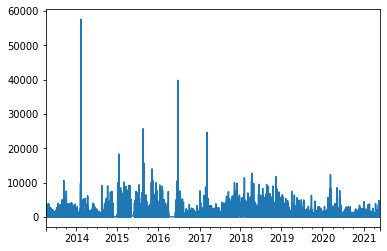

In [26]:
df.liquidity_15min.plot(figsize=(12,6))